# 1. Introduction to Time Series and Machine Learning

## 1.2. Machine learning and time-series data

In [3]:
# Importing the lib
from glob import glob
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Load the New York stock exchange prices 
prices = pd.read_csv('prices.csv', 
            index_col='date',
            parse_dates=True)

prices.head()


,symbol,close,volume
date,,,
2010-01-04,AAPL,214.009998,123432400.0
2010-01-04,ABT,54.459951,10829000.0
2010-01-04,AIG,29.889999,7750900.0
2010-01-04,AMAT,14.300000,18615100.0
2010-01-04,ARNC,16.650013,11512100.0


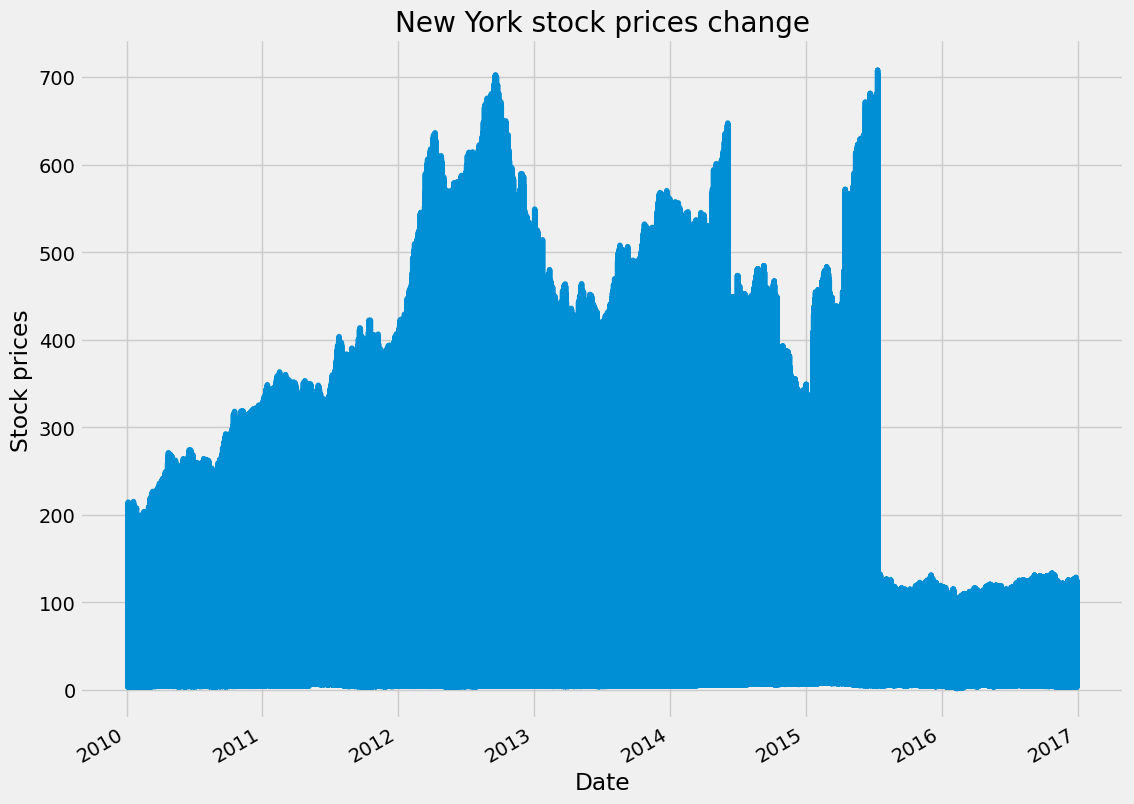

In [6]:
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
prices['close'].plot(ax=ax1, figsize=(12,10))
plt.title('New York stock prices change')
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.show()

In [7]:
# print the type of the data
prices.dtypes
print(prices.dtypes)
prices.index = pd.to_datetime(prices.index)


symbol     object
close     float64
volume    float64
dtype: object


# 2. Time Series Forecasting with Machine Learning

If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This section covers how to gain insights into the data before fitting your model, as well as best practices in using predictive modeling for time series data.

## 2.1. Predicting data over time

We will deal with stock market prices that fluctuate over time. In this section we 've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices

In [8]:
# Load the data
preprocessed_prices = pd.read_csv('preprocessed_prices.csv', parse_dates=True, index_col='date')
preprocessed_prices

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.300000,16.650013,15.690000,9.01,3.400000,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.190000,16.130013,16.200001,9.04,3.530000,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.160000,16.970013,16.389999,9.16,3.640000,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.010000,16.610014,16.930000,9.09,3.650000,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.550000,17.020014,16.780001,9.00,3.590000,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-26,113.099998,44.150002,51.209999,24.240000,16.080012,15.850000,14.96,48.889999,20.139999,56.689999,...,72.610001,9.08,88.120003,33.180000,256.529999,46.959999,53.580002,91.760002,13.74,49.439999
2015-01-27,109.139999,43.680000,50.470001,23.570000,15.920012,15.630000,14.74,48.310001,20.250000,56.360001,...,71.769997,8.97,88.339996,32.810001,250.990005,46.349998,52.970001,90.949997,13.57,47.990002
2015-01-28,115.309998,43.410000,49.209999,23.379999,15.800012,15.200000,14.59,47.110001,19.129999,54.590000,...,70.989998,8.74,87.570000,32.680000,246.360001,46.049999,52.160000,87.949997,13.24,46.459999


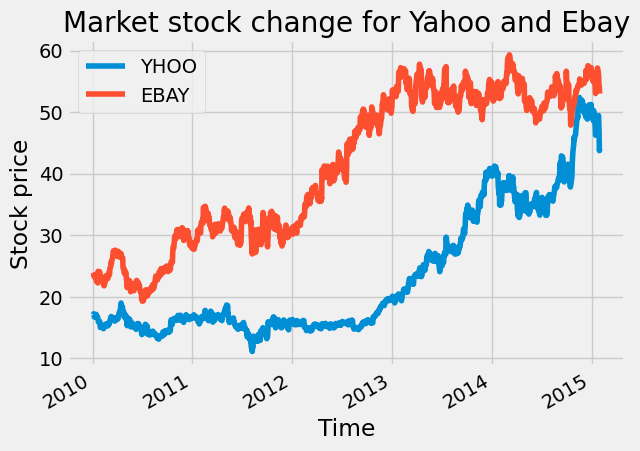

In [9]:
# Plot the raw values over time
preprocessed_prices.plot(y=['YHOO','EBAY'])
plt.title('Market stock change for Yahoo and Ebay')
plt.ylabel('Stock price')
plt.xlabel('Time')
plt.show()

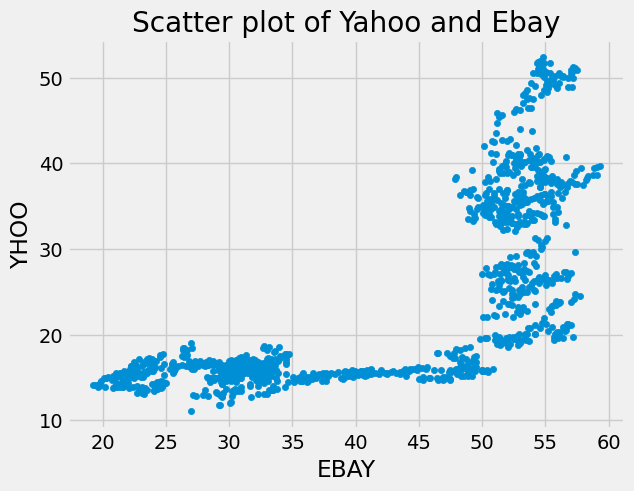

In [10]:
# Scatterplot with one company per axis
preprocessed_prices.plot.scatter('EBAY', 'YHOO')
plt.title('Scatter plot of Yahoo and Ebay')
plt.show()

Finally, encode time as the color of each datapoint in order to visualize how the relationship between these two variables changes.




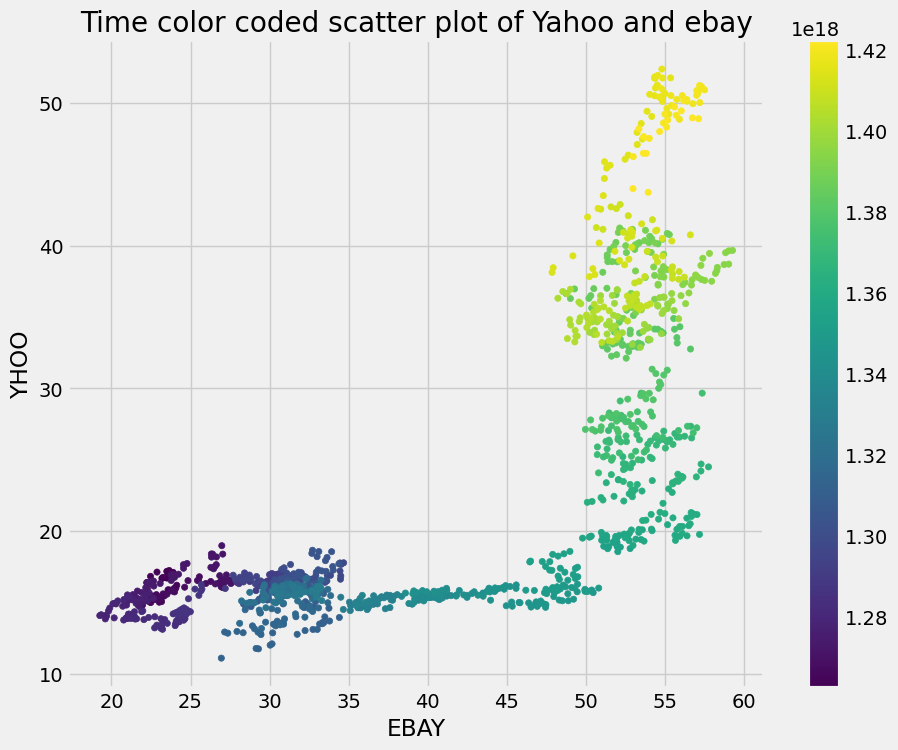

In [11]:
# Scatterplot with color relating to time
preprocessed_prices.plot.scatter('EBAY', 'YHOO', c=preprocessed_prices.index, 
                    cmap=plt.cm.viridis, colorbar=True, figsize=(10,8))

plt.title('Time color coded scatter plot of Yahoo and ebay')
plt.show()

Now we will fit a linear regression, we will use the eBay, Nvidia and Yahoo stock prices as the features and the target value will be Apple stock price. We will use the linear regression model for predicition

In [12]:
#Fitting a simple regression model

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = preprocessed_prices[['EBAY', 'NVDA', 'YHOO']]
y = preprocessed_prices[['AAPL']]
# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


As you can see, fitting a model with raw data doesn't give great results.



-0.33806972562289506


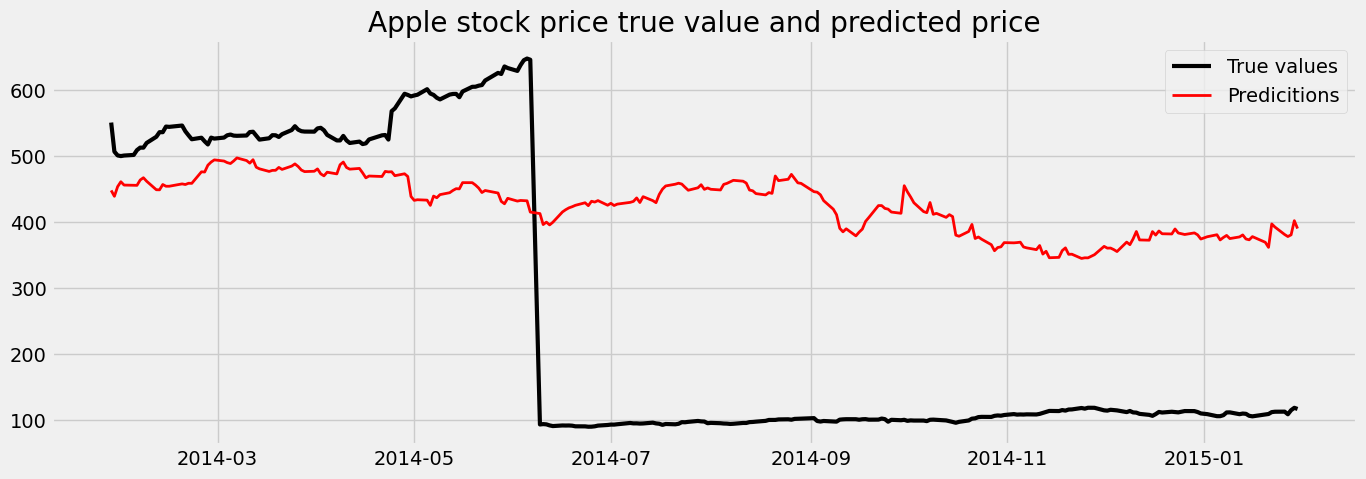

In [13]:
# Visualizing predicted values

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

y_test['predictions'] = predictions
y_test.rename(columns= {'AAPL':'True_vlaue'}, inplace=True)

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test['True_vlaue'], color='k', lw=3)
ax.plot(y_test['predictions'], color='r', lw=2)
ax.legend(['True values', 'Predicitions'])
plt.title('Apple stock price true value and predicted price')
plt.show()

Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.

[Text(0, 0.5, 'stock price')]

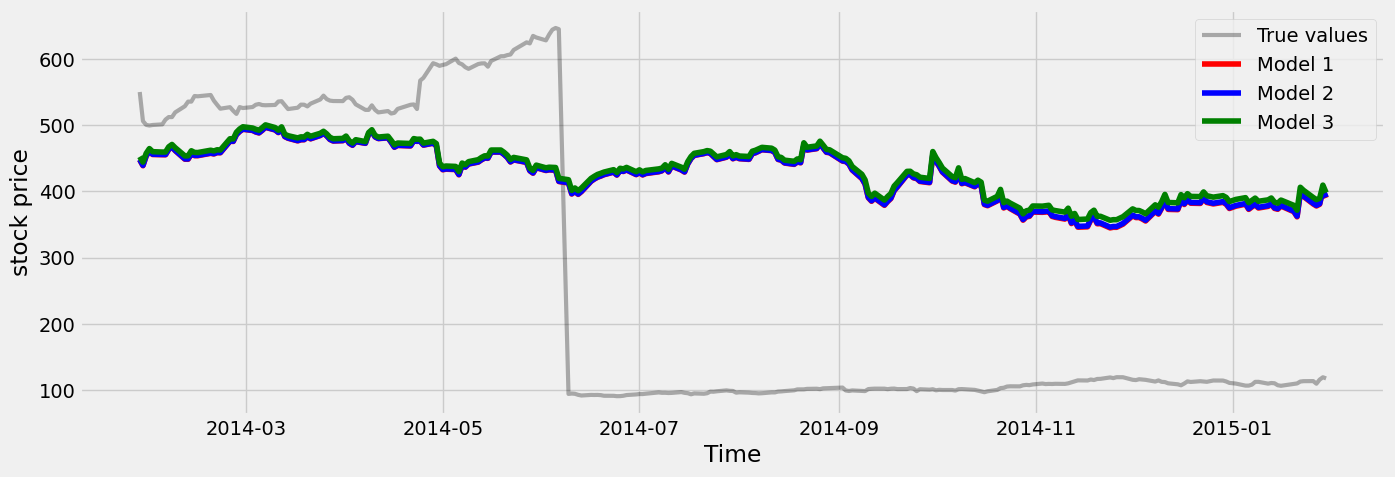

In [14]:
from matplotlib import cm
alphas = [.1, 1e2, 1e3]

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test['True_vlaue'], color='k', alpha=.3, lw=3)
color = ['r','b','g']
for ii, alpha in enumerate(alphas):
    y_test['predictions'] = Ridge(alpha=alpha).fit(X_train, y_train).predict(X_test)
    ax.plot(y_test['predictions'],color[ii])
ax.legend(['True values', 'Model 1', 'Model 2', 'Model 3'])
ax.set(xlabel="Time")
ax.set(ylabel="stock price")


## 2.2. Advanced time series forecatsing

We will use AIG company data, first we will drop some of the rows to act as missed data and then deal with it 

In [15]:
# Create missing rows at random 
def remove_n_consecutive_rows(frame, n, percent):
    chunks_to_remove = int(percent/100*frame.shape[0]/n)
    #split the indices into chunks of length n+2
    chunks = [list(range(i,i+n+2)) for i in range(0, frame.shape[0]-n)]
    drop_indices = list()
    for i in range(chunks_to_remove):
        indices = random.choice(chunks)
        drop_indices+=indices[1:-1]
        #remove all chunks which contain overlapping values with indices
        chunks = [c for c in chunks if not any(n in indices for n in c)]
    #drop_indices = frame.index[drop_indices]    
    frame.iloc[drop_indices,] = np.nan
    return frame

Text(0, 0.5, 'Stock price')

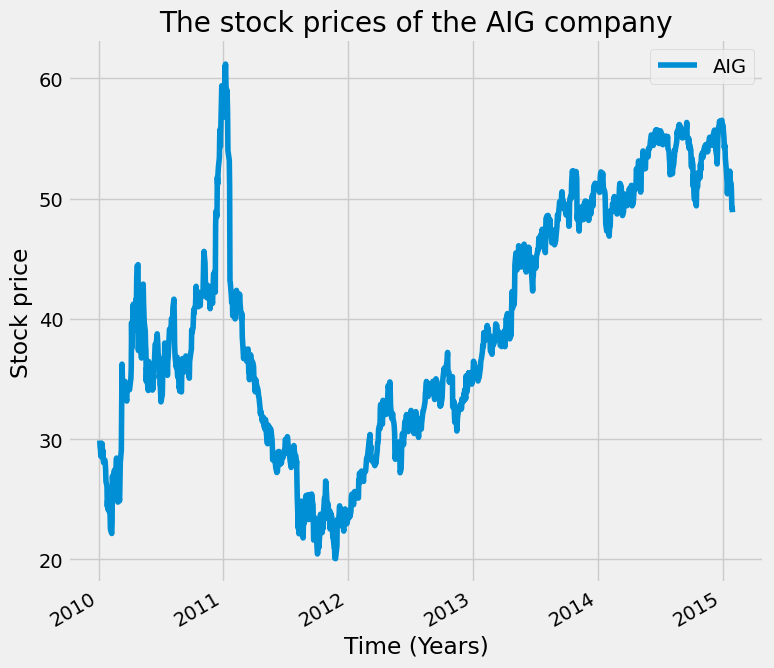

In [16]:
# the AIG data without missing values 
AIG = pd.DataFrame(preprocessed_prices['AIG'])
AIG.plot(figsize=(8,8))

plt.title('The stock prices of the AIG company')
plt.xlabel('Time (Years)')
plt.ylabel('Stock price')

Text(0, 0.5, 'Stock price')

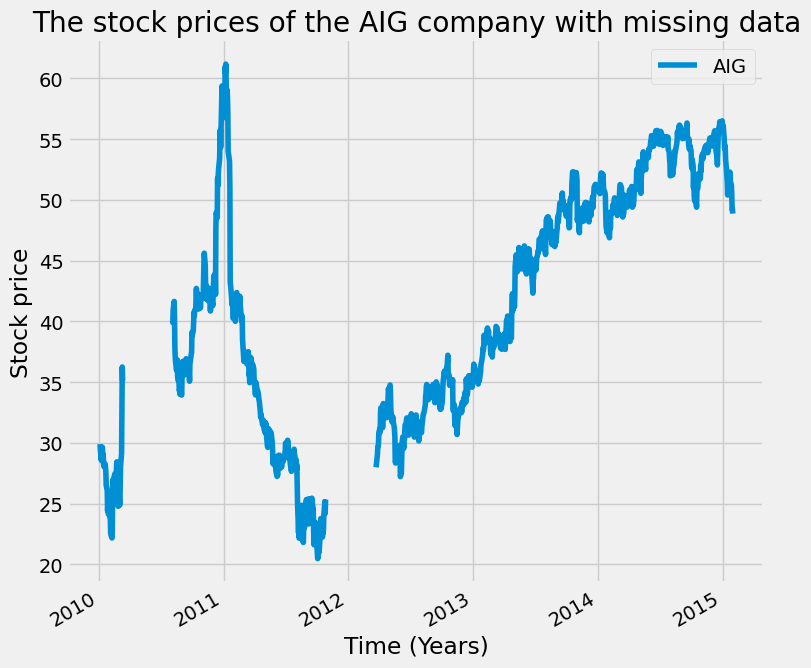

In [17]:
# plotting the missing data
AIG_missing_data = remove_n_consecutive_rows(AIG, 100, 20)

AIG_missing_data.plot(figsize=(8,8))
plt.title('The stock prices of the AIG company with missing data')
plt.xlabel('Time (Years)')
plt.ylabel('Stock price')

Lets now interpolate the missing data

[Text(0.5, 1.0, 'AIG stock price value with missing and interpolated values')]

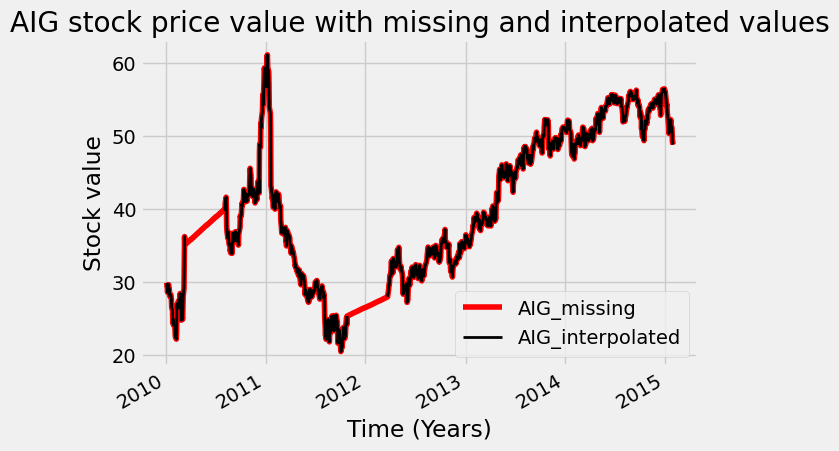

In [18]:
# Interpolation in Pandas

# Return a boolean that notes where missing values are
missing_index = AIG_missing_data.isna()

# Interpolate linearly within missing windows
AIG_interp = AIG_missing_data.interpolate('linear')

# Plot the interpolated data in red and the data w/ missing values in black
ax = AIG_interp.plot(c='r')
AIG_missing_data.plot(c='k',ax=ax, lw=2)
ax.legend(['AIG_missing','AIG_interpolated'])
ax.set(xlabel='Time (Years)')
ax.set(ylabel='Stock value')
ax.set(title='AIG stock price value with missing and interpolated values')

In [19]:
#Transforming to percent change with Pandas

def percent_change(values):
    """Calculates the % change between the last value
    and the mean of previous values"""
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    # Calculate the % difference between the last value
    # and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) \
    / np.mean(previous_values)
    return percent_change

Text(0.5, 0.98, 'AIG stock prices vs percentage change in stock prices')

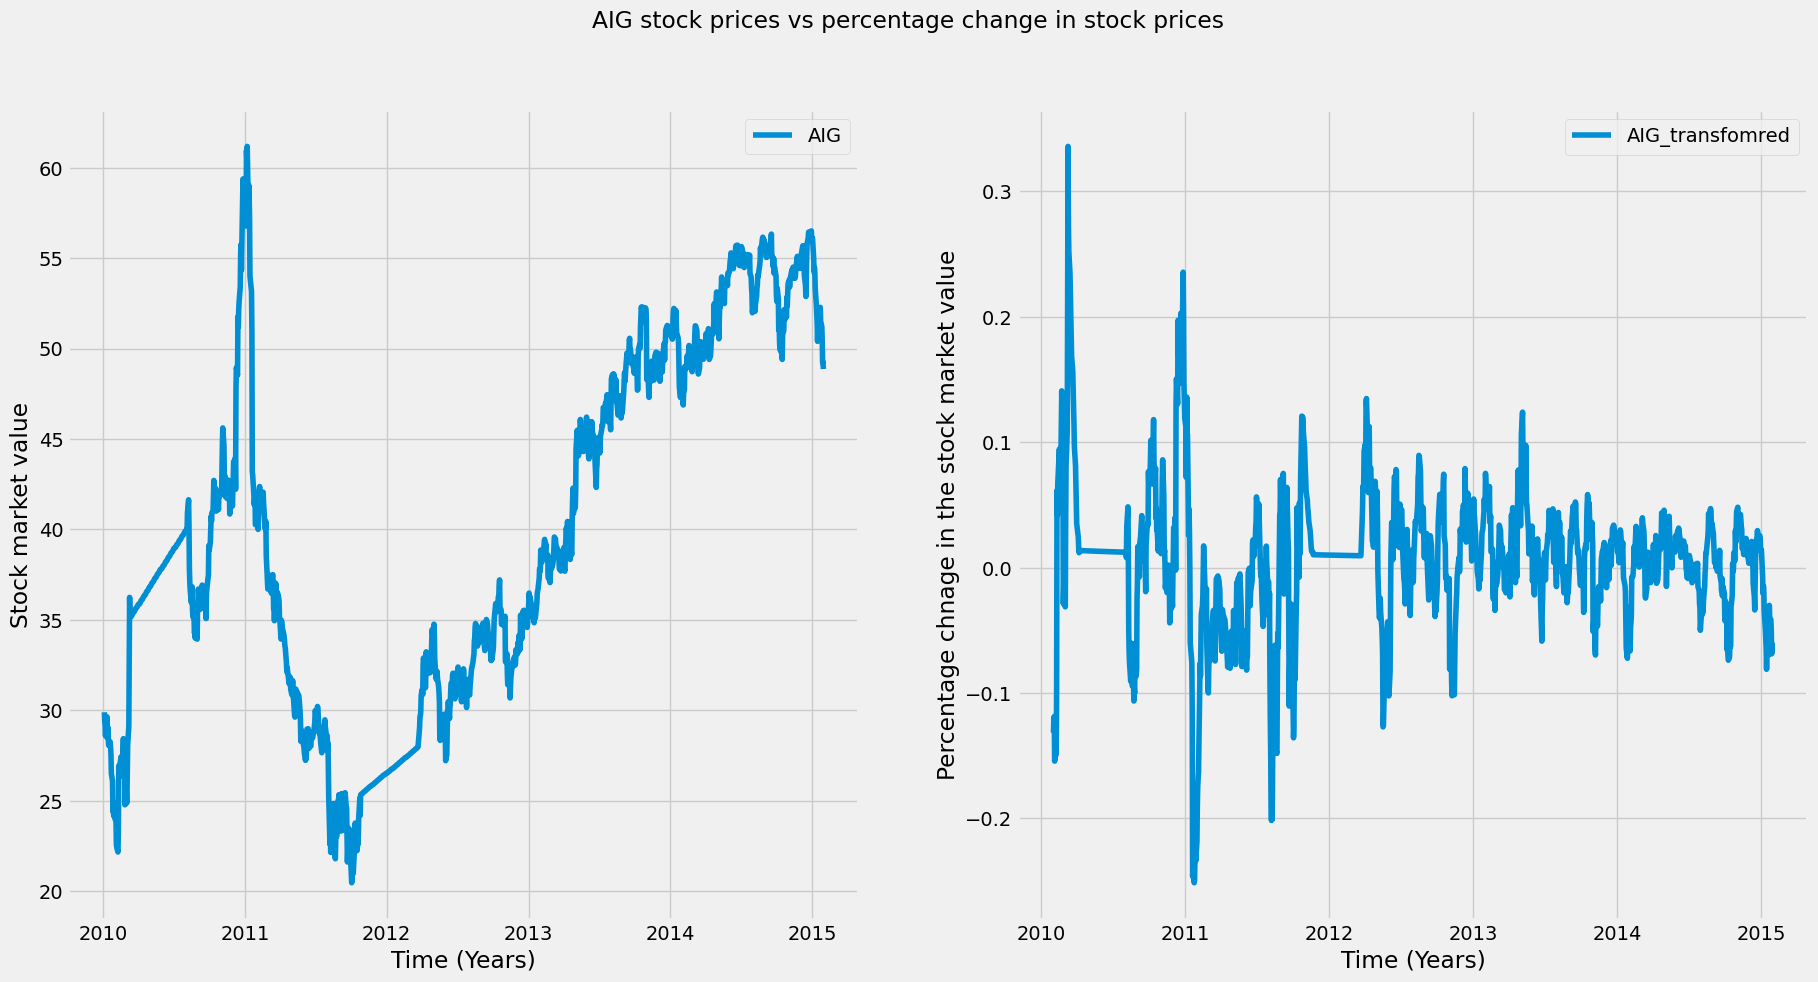

In [20]:
# Applying the transformation to our data

# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# plot the AIG with interplotation
axs[0].plot(AIG_interp, label='AIG')
axs[0].legend()

# Calculate % change and plot
AIG_perc_change = AIG_interp.rolling(window=20).aggregate(percent_change)

# plot the trasnfoemd AIG
axs[1].plot(AIG_perc_change,label= 'AIG_transfomred')
axs[1].legend()

# set the title and x-axis and y-axis labels
axs[0].set(xlabel='Time (Years)')
axs[1].set(xlabel='Time (Years)')
axs[0].set(ylabel='Stock market value')
axs[1].set(ylabel='Percentage chnage in the stock market value')
plt.suptitle('AIG stock prices vs percentage change in stock prices')


#### Finding outliers
Outliers are data points that are statistically different from the dataset as a whole. A common definition is any data point that is more than three standard deviations away from the mean of the dataset.

Text(0.5, 0.98, 'AIG stock prices vs percentage change in stock prices with applied threshold')

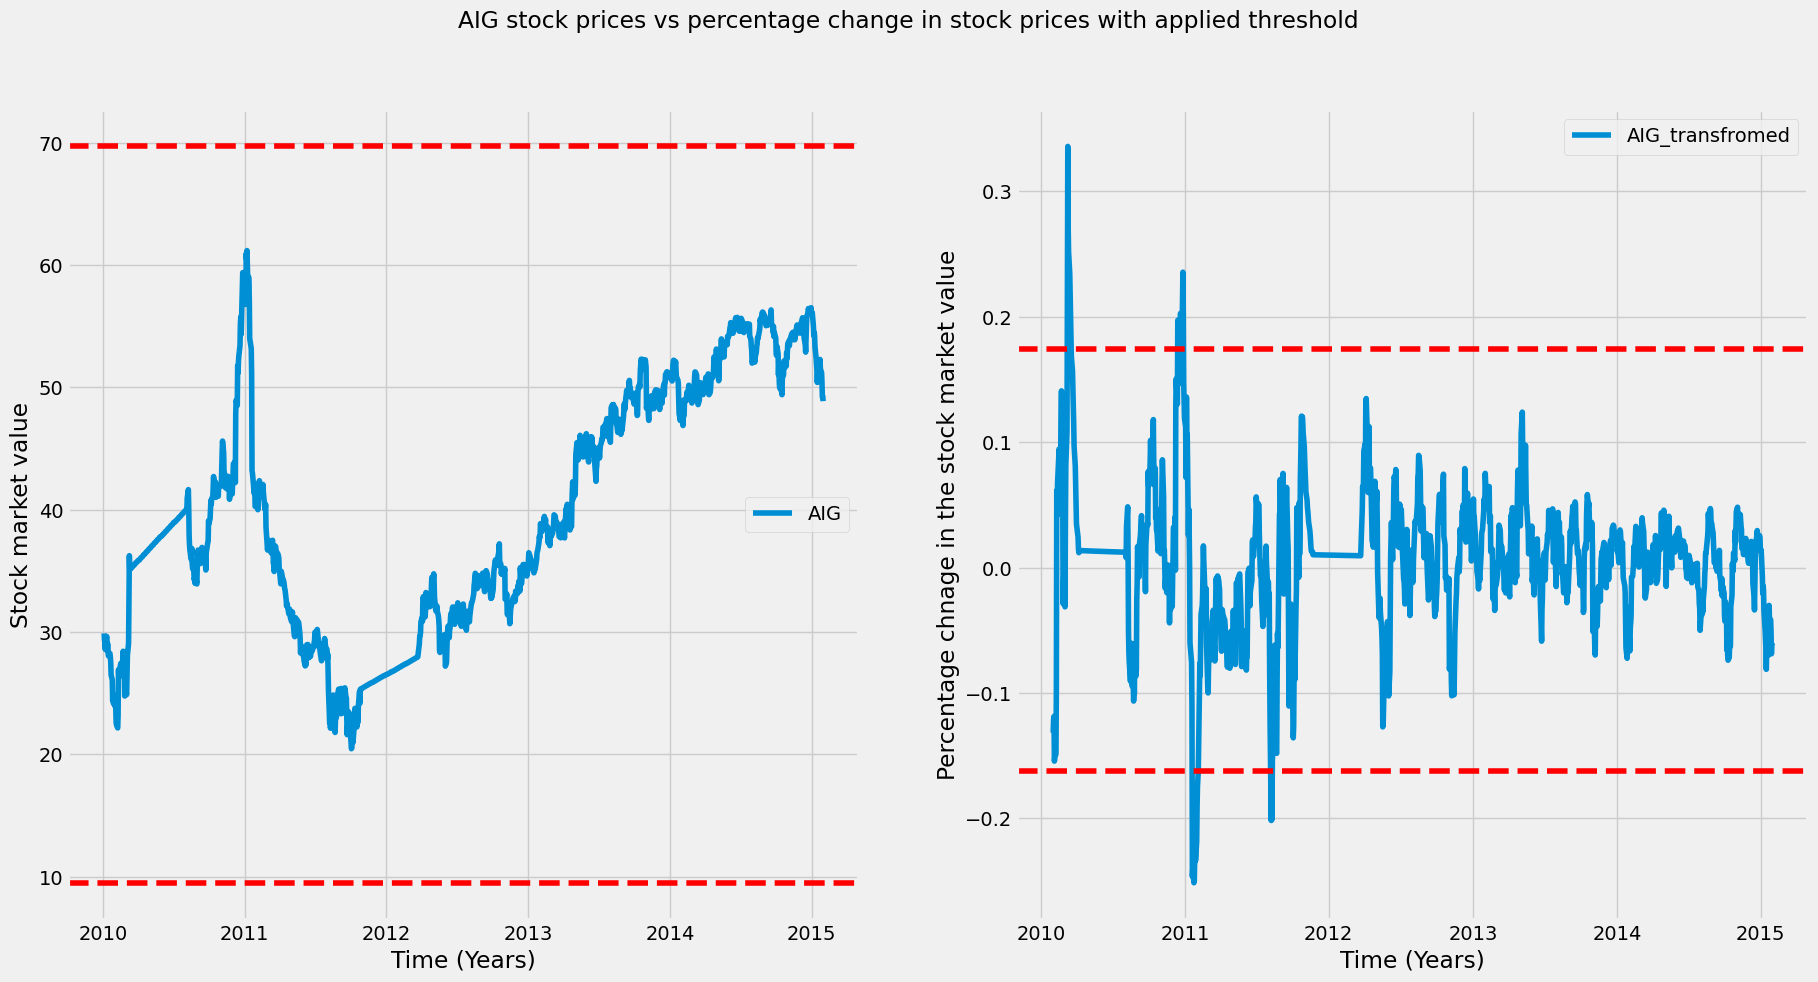

In [21]:
# Plotting a threshold on our data

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
legends = ['AIG','AIG_transfromed']
for data, ax, l in zip([AIG_interp, AIG_perc_change], axs, legends):
    # Calculate the mean / standard deviation for the data
    data_mean = data.mean()
    data_std = data.std()
    # Plot the data, with a window that is 3 standard deviations
    # around the mean
    ax.plot(data, label=l)
    ax.legend()
    ax.axhline(data_mean[0] + data_std[0] * 3, ls='--', c='r')
    ax.axhline(data_mean[0] - data_std[0] * 3, ls='--', c='r')

# set the title and x-axis and y-axis labels
axs[0].set(xlabel='Time (Years)')
axs[1].set(xlabel='Time (Years)')
axs[0].set(ylabel='Stock market value')
axs[1].set(ylabel='Percentage chnage in the stock market value')
plt.suptitle('AIG stock prices vs percentage change in stock prices with applied threshold')
    

Lets replace the outliers using the threshold


In [22]:
# Center the data so the mean is 0
AIGِ_outlier_centered = AIG_perc_change - AIG_perc_change.mean()

# Calculate standard deviation
std = AIG_perc_change.std()

# Use the absolute value of each datapoint
# to make it easier to find outliers
outliers = np.abs(AIGِ_outlier_centered) > (std * 3)

# Replace outliers with the median value
# We'll use np.nanmean since there may be nans around the outliers
AIG_outlier_fixed = AIGِ_outlier_centered.copy()
AIG_outlier_fixed[outliers] = np.nanmedian(AIG_outlier_fixed)

[Text(0, 0.5, 'Percentage chnage in the stock market value')]

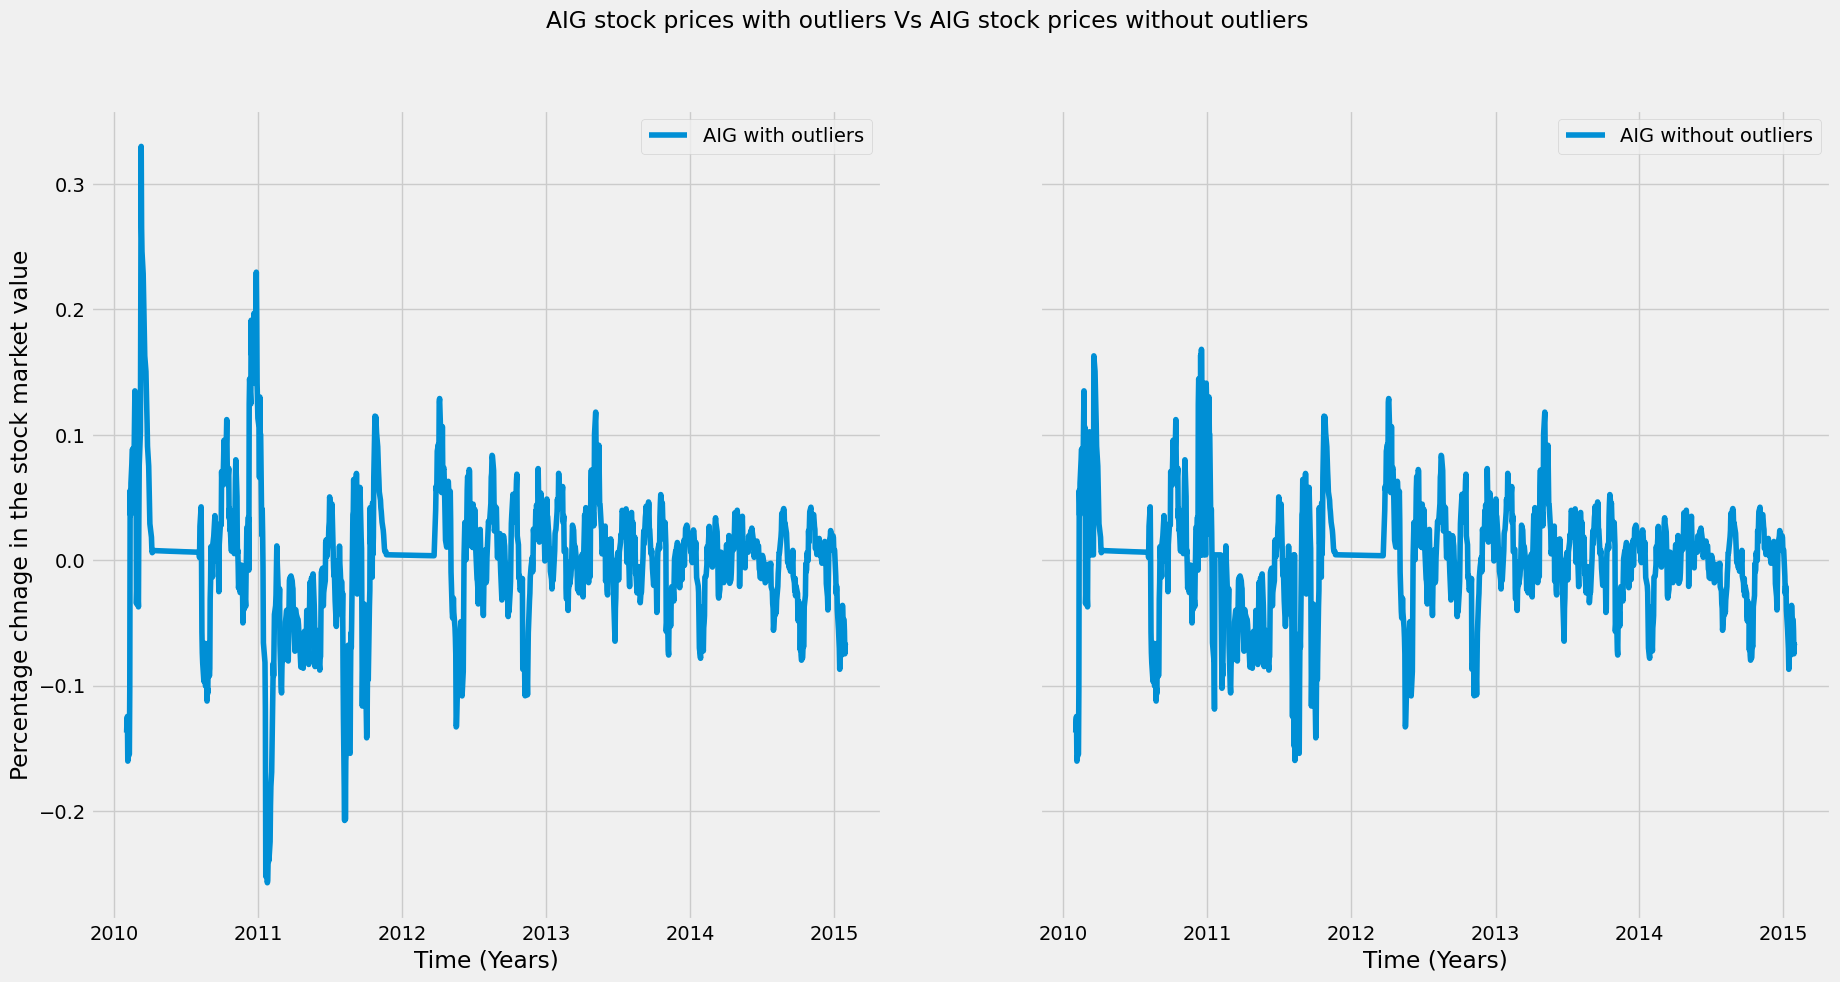

In [23]:
fig, axs = plt.subplots(1, 2,sharey=True,figsize=(20, 10))
axs[0].plot(AIGِ_outlier_centered, label='AIG with outliers')
axs[1].plot(AIG_outlier_fixed, label='AIG without outliers')

axs[0].legend()
axs[1].legend()

axs[0].set(xlabel='Time (Years)')
axs[1].set(xlabel='Time (Years)')
plt.suptitle('AIG stock prices with outliers Vs AIG stock prices without outliers ')
axs[0].set(ylabel='Percentage chnage in the stock market value')
    

## 3.3. Creating features over time

In [24]:
#Using .aggregate for feature extraction
# Visualize the raw data
preprocessed_prices.head(5)

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [25]:
# Calculate a rolling window, then extract two features
feats = preprocessed_prices.rolling(20).aggregate([np.std, np.max]).dropna()
feats.head(5)

AAPL                   ABT                  AIG             \
                 std        amax       std       amax       std       amax   
date                                                                         
2010-02-01  6.536228  215.039995  0.868830  56.239949  2.051966  29.889999   
2010-02-02  6.776924  215.039995  0.869197  56.239949  2.101032  29.629999   
2010-02-03  6.655202  215.039995  0.852509  56.239949  2.157249  29.629999   
2010-02-04  7.148351  215.039995  0.873895  56.239949  2.282004  29.629999   
2010-02-05  7.265069  215.039995  0.891497  56.239949  2.400626  29.629999   

                AMAT             ARNC             ...        VZ             \
                 std   amax       std       amax  ...       std       amax   
date                                              ...                        
2010-02-01  0.815610  14.87  1.557116  17.450013  ...  1.149069  33.339868   
2010-02-02  0.834197  14.87  1.541017  17.450013  ...  1.061109  33.339868   
2010-02-03  0.862663  14.87  1.545563  17.450013  ...  0.958873  31.919873   
2010-02-04  0.916897  14.87  1.511028  17.450013  ...  1.016933  31.909874   
2010-02-05  0.931594  14.87  1.463785  17.450013  ...  1.049564  31.909874   

                 WFC                  XOM                  XRX        \
                 std       amax       std       amax       std  amax   
date                                                                   
2010-02-01  0.595400  29.129999  2.001458  70.300003  0.176543  9.28   
2010-02-02  0.571024  29.129999  1.993971  70.300003  0.181902  9.28   
2010-02-03  0.569911  29.129999  1.978278  70.300003  0.176792  9.28   
2010-02-04  0.631350  29.129999  2.010031  70.300003  0.169383  9.28   
2010-02-05  0.618206  28.990000  2.015196  70.300003  0.182592  9.28   

                YHOO             
                 std       amax  
date                             
2010-02-01  0.681782  17.230000  
2010-02-02  0.711206  17.230000  
2010-02-03  0.697884  17.170000  
2010-02-04  0.706948  17.120001  
2010-02-05  0.719124  17.120001  

[5 rows x 92 columns]

Text(0.5, 1.0, 'The std Vs max of the stock price change of Apple')

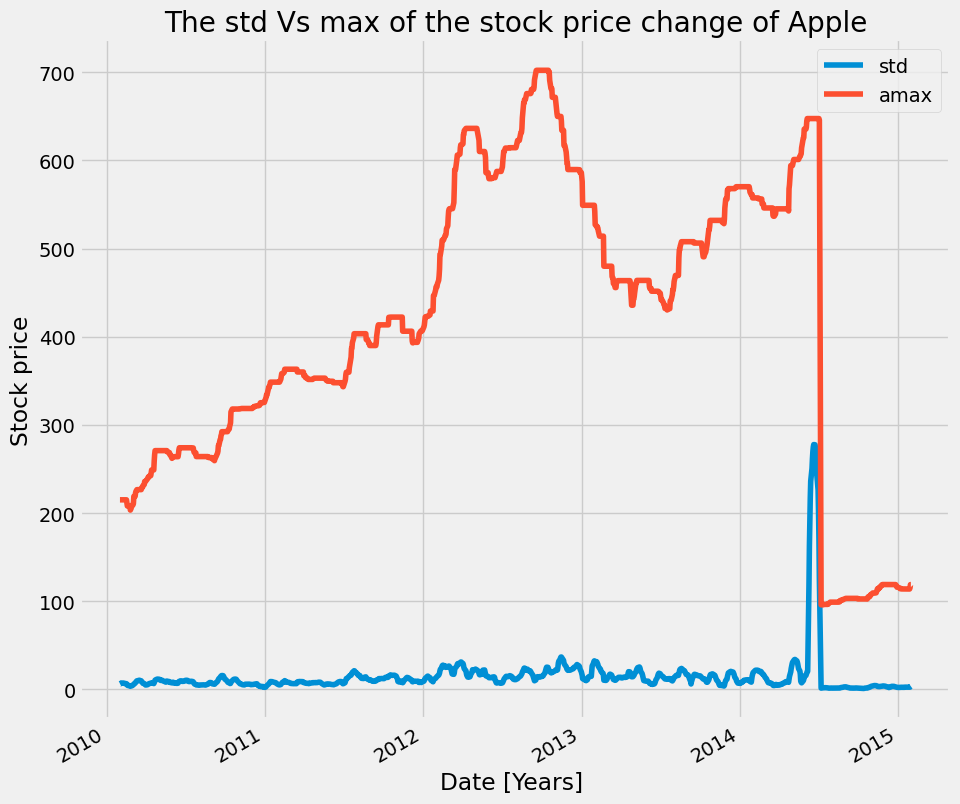

In [26]:
feats['AAPL'].plot(figsize=(10, 10))
plt.xlabel('Date [Years] ')
plt.ylabel('Stock price')
plt.title('The std Vs max of the stock price change of Apple')

#### Using partial() in Python
A useful tool when using the dot-aggregate method is the partial function. This is built-in to Python, and lets you create a *new* function from an old one, with some of the parameters pre-configured.

In [27]:
# If we just take the mean, it returns a single value
a = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2]])
print(np.mean(a))

1.0


In [28]:
# We can use the partial function to initialize np.mean
# with an axis parameter
from functools import partial
mean_over_first_axis = partial(np.mean, axis=0)
print(mean_over_first_axis(a))

[0. 1. 2.]


In [29]:
# Percentiles summarize your data
print(np.percentile(np.linspace(0, 200), q=20))

40.0


In [30]:
# Combining np.percentile() with partial functions to calculate a range of percentiles and apply it on toy data
data = np.linspace(0, 100)
# Create a list of functions using a list comprehension
percentile_funcs = [partial(np.percentile, q=ii) for ii in [20, 40, 60]]
# Calculate the output of each function in the same way
percentiles = [i_func(data) for i_func in percentile_funcs]
print(percentiles)

[20.0, 40.0, 60.0]


In [31]:
# Calculate multiple percentiles of a rolling window on our prices time series
preprocessed_prices.rolling(20).aggregate(percentile_funcs).dropna()

AAPL                                ABT             \
            percentile  percentile  percentile percentile percentile   
date                                                                   
2010-02-01  202.314001  207.816003  210.298002  54.005953  54.497952   
2010-02-02  198.981996  207.008001  209.702001  54.005953  54.497952   
2010-02-03  198.933995  205.936001  208.613998  54.245953  54.593951   
2010-02-04  197.371999  204.786001  207.956001  53.939952  54.593951   
2010-02-05  195.779998  201.557999  207.784003  53.939952  54.497952   
...                ...         ...         ...        ...        ...   
2015-01-26  107.564000  109.462003  110.983998  44.206001  44.490002   
2015-01-27  107.564000  109.298001  110.283999  44.132002  44.454002   
2015-01-28  107.564000  109.298001  110.283999  44.038001  44.352001   
2015-01-29  107.564000  109.298001  110.283999  44.038001  44.352001   
2015-01-30  107.564000  109.298001  110.888000  44.038001  44.352001   

                             AIG                             AMAT  ...  \
           percentile percentile percentile percentile percentile  ...   
date                                                               ...   
2010-02-01  55.097952  24.808000  27.795999  28.507999  12.638000  ...   
2010-02-02  55.097952  24.366000  27.129999  28.334000  12.626000  ...   
2010-02-03  55.097952  24.216000  26.336000  28.135999  12.592000  ...   
2010-02-04  55.097952  24.122000  25.618000  27.999999  12.518000  ...   
2010-02-05  55.097952  23.967999  24.706000  27.713999  12.464000  ...   
...               ...        ...        ...        ...        ...  ...   
2015-01-26  44.904001  51.189999  52.115999  54.228001  23.441999  ...   
2015-01-27  44.816000  51.054001  51.725999  53.680000  23.441999  ...   
2015-01-28  44.670000  50.794002  51.457999  52.744001  23.369999  ...   
2015-01-29  44.670000  50.614002  51.312000  52.312000  23.369999  ...   
2015-01-30  44.670000  50.456001  51.170000  52.033999  23.330000  ...   

                  WFC        XOM                              XRX             \
           percentile percentile percentile percentile percentile percentile   
date                                                                           
2010-02-01  28.340001  65.905998  67.497998  69.329997      8.638      8.832   
2010-02-02  28.438000  65.905998  66.855998  69.329997      8.704      8.846   
2010-02-03  28.438000  65.905998  66.659997  69.173999      8.768      8.856   
2010-02-04  28.438000  65.787999  66.431999  68.462000      8.768      8.856   
2010-02-05  28.340001  65.424001  66.147999  67.387999      8.768      8.856   
...               ...        ...        ...        ...        ...        ...   
2015-01-26  53.379999  90.232001  91.009997  91.962001     13.490     13.636   
2015-01-27  53.224000  90.232001  90.925998  91.804002     13.490     13.596   
2015-01-28  53.062001  89.962000  90.822000  91.376003     13.448     13.586   
2015-01-29  52.843999  89.795998  90.564001  91.101999     13.448     13.576   
2015-01-30  52.711999  89.583998  90.314002  91.005997     13.430     13.566   

                            YHOO                        
           percentile percentile percentile percentile  
date                                                    
2010-02-01      8.890  15.876000  16.308000  16.716001  
2010-02-02      8.890  15.776000  16.116001  16.700001  
2010-02-03      8.890  15.456000  15.986000  16.688000  
2010-02-04      8.890  15.386000  15.940000  16.499999  
2010-02-05      8.890  15.186000  15.872000  16.272000  
...               ...        ...        ...        ...  
2015-01-26     13.744  48.070000  48.853999  49.301999  
2015-01-27     13.734  47.918002  48.715999  49.162000  
2015-01-28     13.724  47.606000  48.474000  49.022001  
2015-01-29     13.684  47.301999  48.251999  48.914000  
2015-01-30     13.624  46.468001  48.104001  48.835999  

[1259 rows x 138 columns]

In [32]:
# datetime features using Pandas
# Ensure our index is datetime
preprocessed_prices.index = pd.to_datetime(preprocessed_prices.index)

# Extract datetime features
day_of_week_num = preprocessed_prices.index.weekday
print('Days of the week in numbers:', day_of_week_num[:10])

day_of_week = preprocessed_prices.index.day_name()
print('Days of the week in names:', day_of_week[:10])

Days of the week in numbers: Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype='int64', name='date')
Days of the week in names: Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='date')


# 3. Evaluation and Inspecting Time Series Models

## 3.1. Creating features from the past


In [33]:
# create shifts in the data

# slice the AIG company data
rough_signal = preprocessed_prices['AIG']

# Shifts 
shifts = [1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): rough_signal.shift(ii) for ii in shifts}

# Convert the shifts into a dataframe
many_shifts = pd.DataFrame(many_shifts)
many_shifts.fillna(0, inplace=True)
many_shifts.head(15)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,29.889999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,29.330000,29.889999,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,29.139999,29.330000,29.889999,0.000000,0.000000,0.000000,0.000000
2010-01-08,28.580000,29.139999,29.330000,29.889999,0.000000,0.000000,0.000000
2010-01-11,29.340000,28.580000,29.139999,29.330000,29.889999,0.000000,0.000000
2010-01-12,29.629999,29.340000,28.580000,29.139999,29.330000,29.889999,0.000000
2010-01-13,28.459999,29.629999,29.340000,28.580000,29.139999,29.330000,29.889999
2010-01-14,29.059999,28.459999,29.629999,29.340000,28.580000,29.139999,29.330000


In [36]:
# Fit the model using these input features
model = Ridge()
model.fit(many_shifts, rough_signal)

Ridge()

In [37]:
model.coef_ 

array([ 0.96129868,  0.03852595, -0.00253452,  0.03670197, -0.07205864,
        0.01109602,  0.01474515])

Text(0.5, 1.0, 'Model coefficients for each lag')

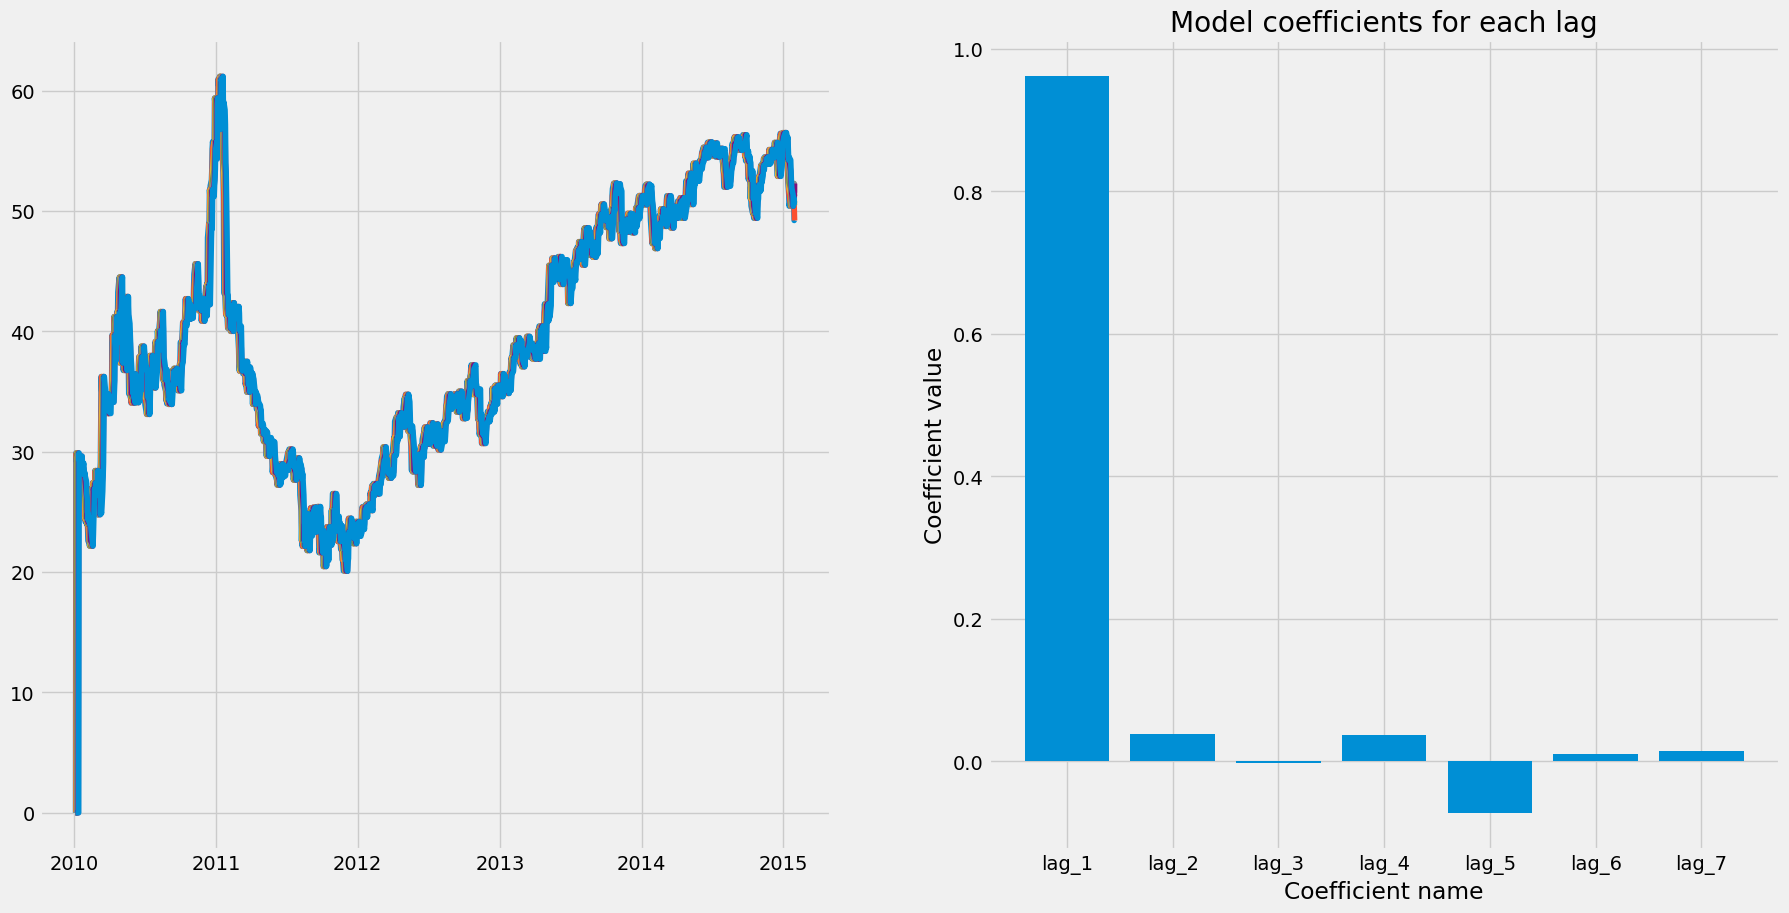

In [38]:
# Visualize the fit model coefficients
fig, axs = plt.subplots(1, 2,figsize=(20, 10))

axs[0].plot(many_shifts)


axs[1].bar(many_shifts.columns, model.coef_)
axs[1].set(xlabel='Coefficient name', ylabel='Coefficient value')


# Set formatting so it looks nice
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Model coefficients for each lag')

In [39]:
preprocessed_prices.columns

Index(['AAPL', 'ABT', 'AIG', 'AMAT', 'ARNC', 'BAC', 'BSX', 'C', 'CHK', 'CMCSA',
       'CSCO', 'DAL', 'EBAY', 'F', 'FCX', 'FITB', 'FOXA', 'FTR', 'GE', 'GILD',
       'GLW', 'HAL', 'HBAN', 'HPQ', 'INTC', 'JPM', 'KEY', 'KO', 'MRK', 'MRO',
       'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PFE', 'QCOM', 'RF', 'SBUX', 'T',
       'V', 'VZ', 'WFC', 'XOM', 'XRX', 'YHOO'],
      dtype='object')

# Applying to a smooth signal 

In [40]:
# create shifts in the data

# slice the AIG company data
smooth_signal = preprocessed_prices['INTC']

# Shifts 
shifts = [1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): smooth_signal.shift(ii) for ii in shifts}

# Convert the shifts into a dataframe
many_shifts = pd.DataFrame(many_shifts)
many_shifts.fillna(0, inplace=True)
many_shifts.head(15)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,20.879999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,20.870001,20.879999,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,20.799999,20.870001,20.879999,0.000000,0.000000,0.000000,0.000000
2010-01-08,20.600000,20.799999,20.870001,20.879999,0.000000,0.000000,0.000000
2010-01-11,20.830000,20.600000,20.799999,20.870001,20.879999,0.000000,0.000000
2010-01-12,20.950001,20.830000,20.600000,20.799999,20.870001,20.879999,0.000000
2010-01-13,20.610001,20.950001,20.830000,20.600000,20.799999,20.870001,20.879999
2010-01-14,20.959999,20.610001,20.950001,20.830000,20.600000,20.799999,20.870001


<AxesSubplot: xlabel='date'>

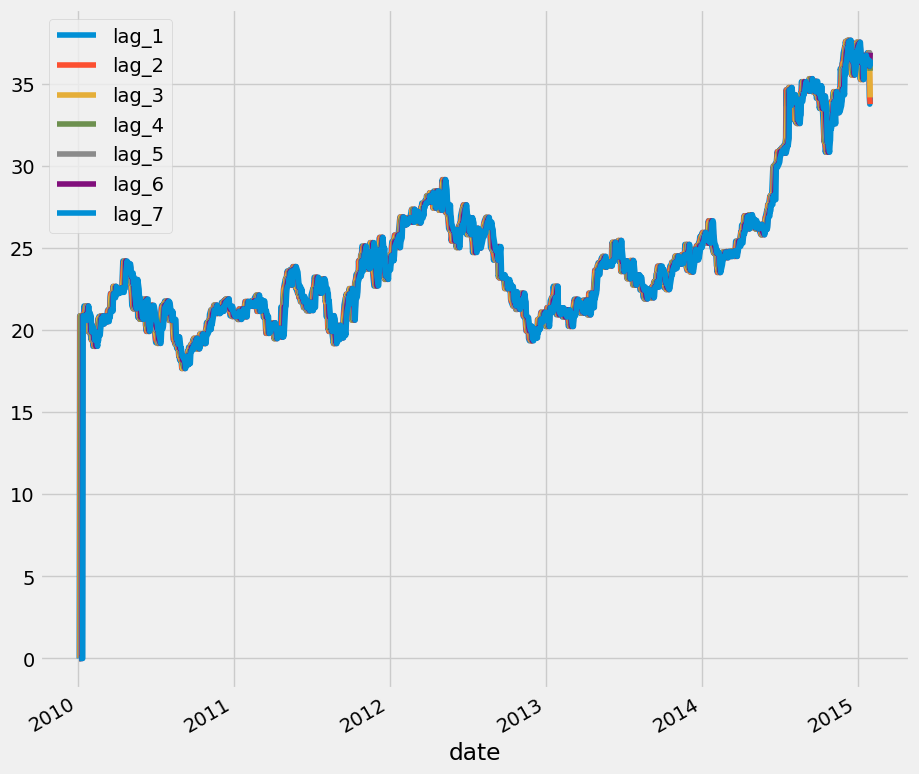

In [41]:
many_shifts.plot(figsize=(10,10))

In [42]:
# Fit the model using these input features
model = Ridge()
model.fit(many_shifts, smooth_signal)

Ridge()

Text(0.5, 1.0, 'Model coefficients for each lag')

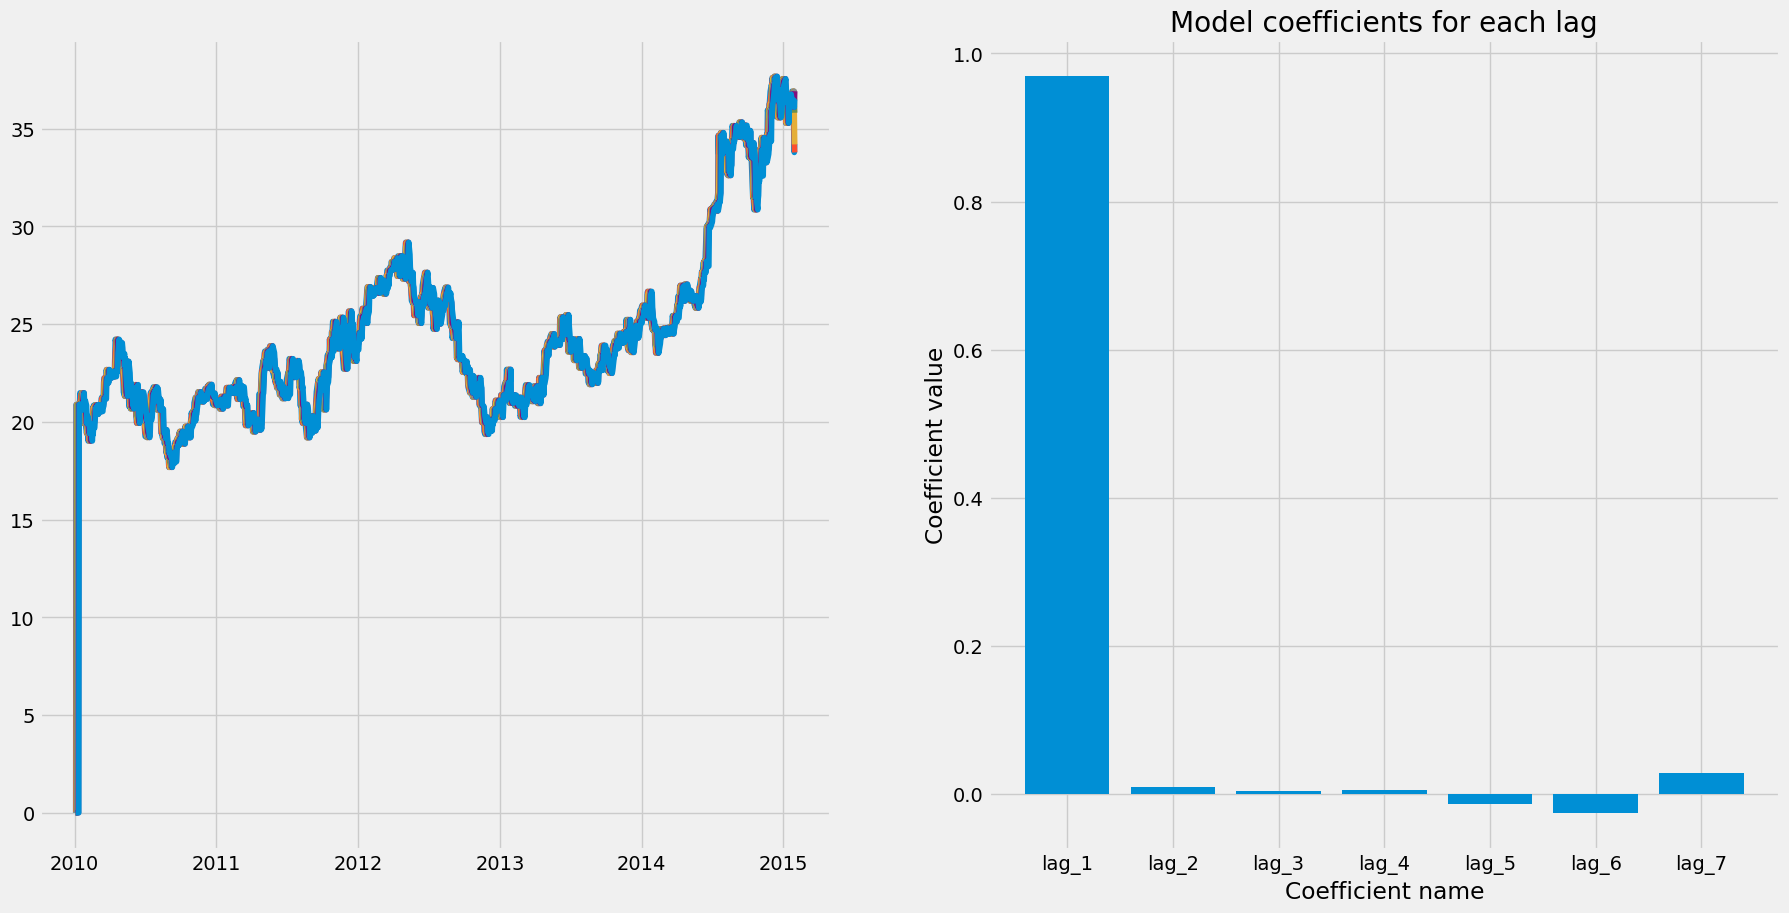

In [43]:
# Visualize the fit model coefficients
fig, axs = plt.subplots(1, 2,figsize=(20, 10))

axs[0].plot(many_shifts)

axs[1].bar(many_shifts.columns, model.coef_)
axs[1].set(xlabel='Coefficient name', ylabel='Coefficient value')

# Set formatting so it looks nice
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Model coefficients for each lag')

## 3.2. Cross-validating time-series data


In [53]:
X_df = X.copy()

In [54]:
X_df

,EBAY,NVDA,YHOO
date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001
...,...,...,...
2015-01-26,56.059999,20.620001,49.439999
2015-01-27,54.690000,19.629999,47.990002
2015-01-28,53.839999,19.309999,46.459999


In [55]:
X

,EBAY,NVDA,YHOO
date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001
...,...,...,...
2015-01-26,56.059999,20.620001,49.439999
2015-01-27,54.690000,19.629999,47.990002
2015-01-28,53.839999,19.309999,46.459999


In [60]:
def visualize_predictions(results):
    i = 0
    plt.figure(figsize=(10,10))
    for result in results:
        plt.plot(result[2],result[0],'o', label='iteration'+str(i))
        plt.legend()
        plt.xlabel('time')
        plt.title('predicition order by time')
        i = i+1
    
    i = 1
    plt.figure(figsize=(10,10))
    for result in results:
        plt.plot(np.arange((i-1)*len(result[0]),(i)*len(result[0])), result[0], 'o')
        plt.xlabel('time')
        plt.title('Prediction order by test prediction number')
        i = i+1
        
        

In [62]:
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

KeyError: "None of [Int64Index([ 479,  370,  303,  204,  568,  383,  270, 1245,  550,  335,\n            ...\n             749,  129,  144,  960,  847,  715,  905, 1096,  235, 1061],\n           dtype='int64', length=1150)] are in the [columns]"

In [63]:
def visualize_predictions(results):
    i = 0
    plt.figure(figsize=(10,10))
    for result in results:
        plt.plot(result[1],result[0],'o', label='iteration'+str(i))
        plt.legend()
        plt.xlabel('time')
        plt.title('predicition order by time')
        i = i+1
    
    i = 1
    plt.figure(figsize=(10,10))
    for result in results:
        plt.plot(np.arange((i-1)*len(result[0]),(i)*len(result[0])), result[0], 'o')
        plt.xlabel('time')
        plt.title('Prediction order by test prediction number')
        i = i+1
        
        

In [64]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr],y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

KeyError: "None of [Int64Index([ 128,  129,  130,  131,  132,  133,  134,  135,  136,  137,\n            ...\n            1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277],\n           dtype='int64', length=1150)] are in the [columns]"

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            108, 109, 110, 111, 112, 113, 114, 115, 116, 117],\n           dtype='int64', length=118)] are in the [columns]"

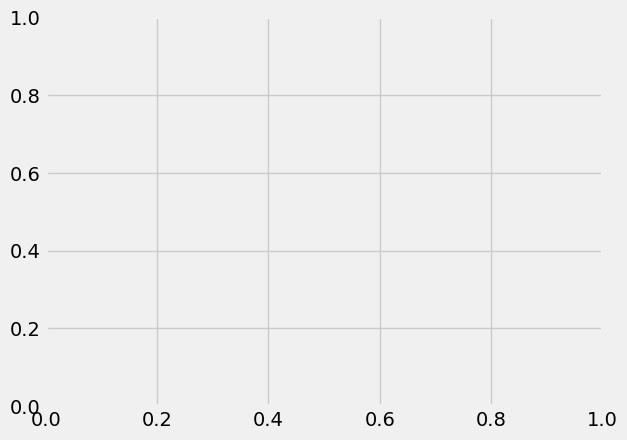

In [65]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr]/1000)
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
ax.set(xlabel='time')
plt.show()

## 3.3. Stationarity and stability

In [66]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)
cv_coefficeints = []
# Iterate through CV splits
results = []

for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr],y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))
    cv_coefficeints.append(model.coef_)
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

KeyError: "None of [Int64Index([ 128,  129,  130,  131,  132,  133,  134,  135,  136,  137,\n            ...\n            1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277],\n           dtype='int64', length=1150)] are in the [columns]"

In [67]:
np.shape(cv_coefficeints)[-1]

0

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must be the same size

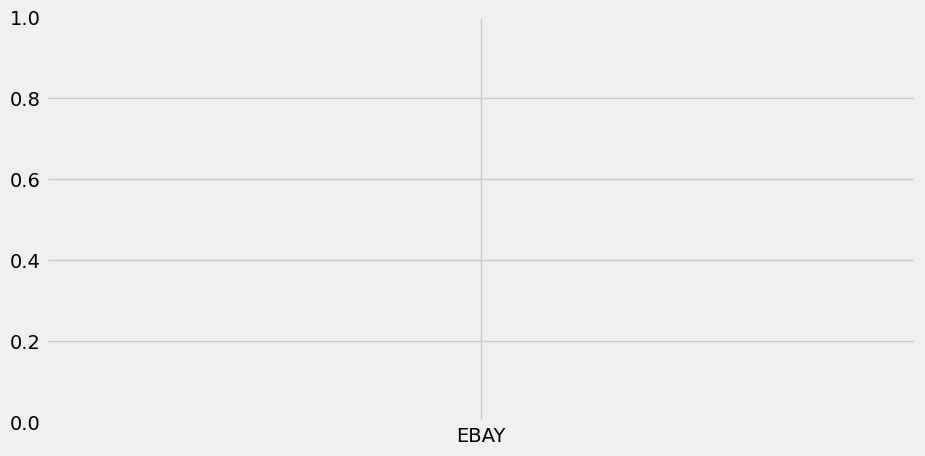

In [68]:
# Bootstrapping the mean
from sklearn.utils import resample

# cv_coefficients has shape (n_cv_folds, n_coefficients)
n_coefficients = np.shape(cv_coefficeints)[-1]
n_boots = 100
bootstrap_means = np.zeros((n_boots, n_coefficients))
                           
for ii in range(n_boots):
    # Generate random indices for our data with replacement,
    # then take the sample mean
    random_sample = resample(cv_coefficeints)
    bootstrap_means[ii] = np.mean(random_sample,axis=0)
    
# Compute the percentiles of choice for the bootstrapped means
percentiles = np.percentile(bootstrap_means, (2.5, 97.5), axis=0)

# Plotting the bootstrapped coefficients
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_df.columns, percentiles[0], marker='_', s=200)
ax.scatter(X_df.columns, percentiles[1], marker='_', s=200)
ax.set(title='95% confidence intervals for model coefficients')

### Assessing model performance stability

[Text(0.5, 1.0, 'Validation data')]

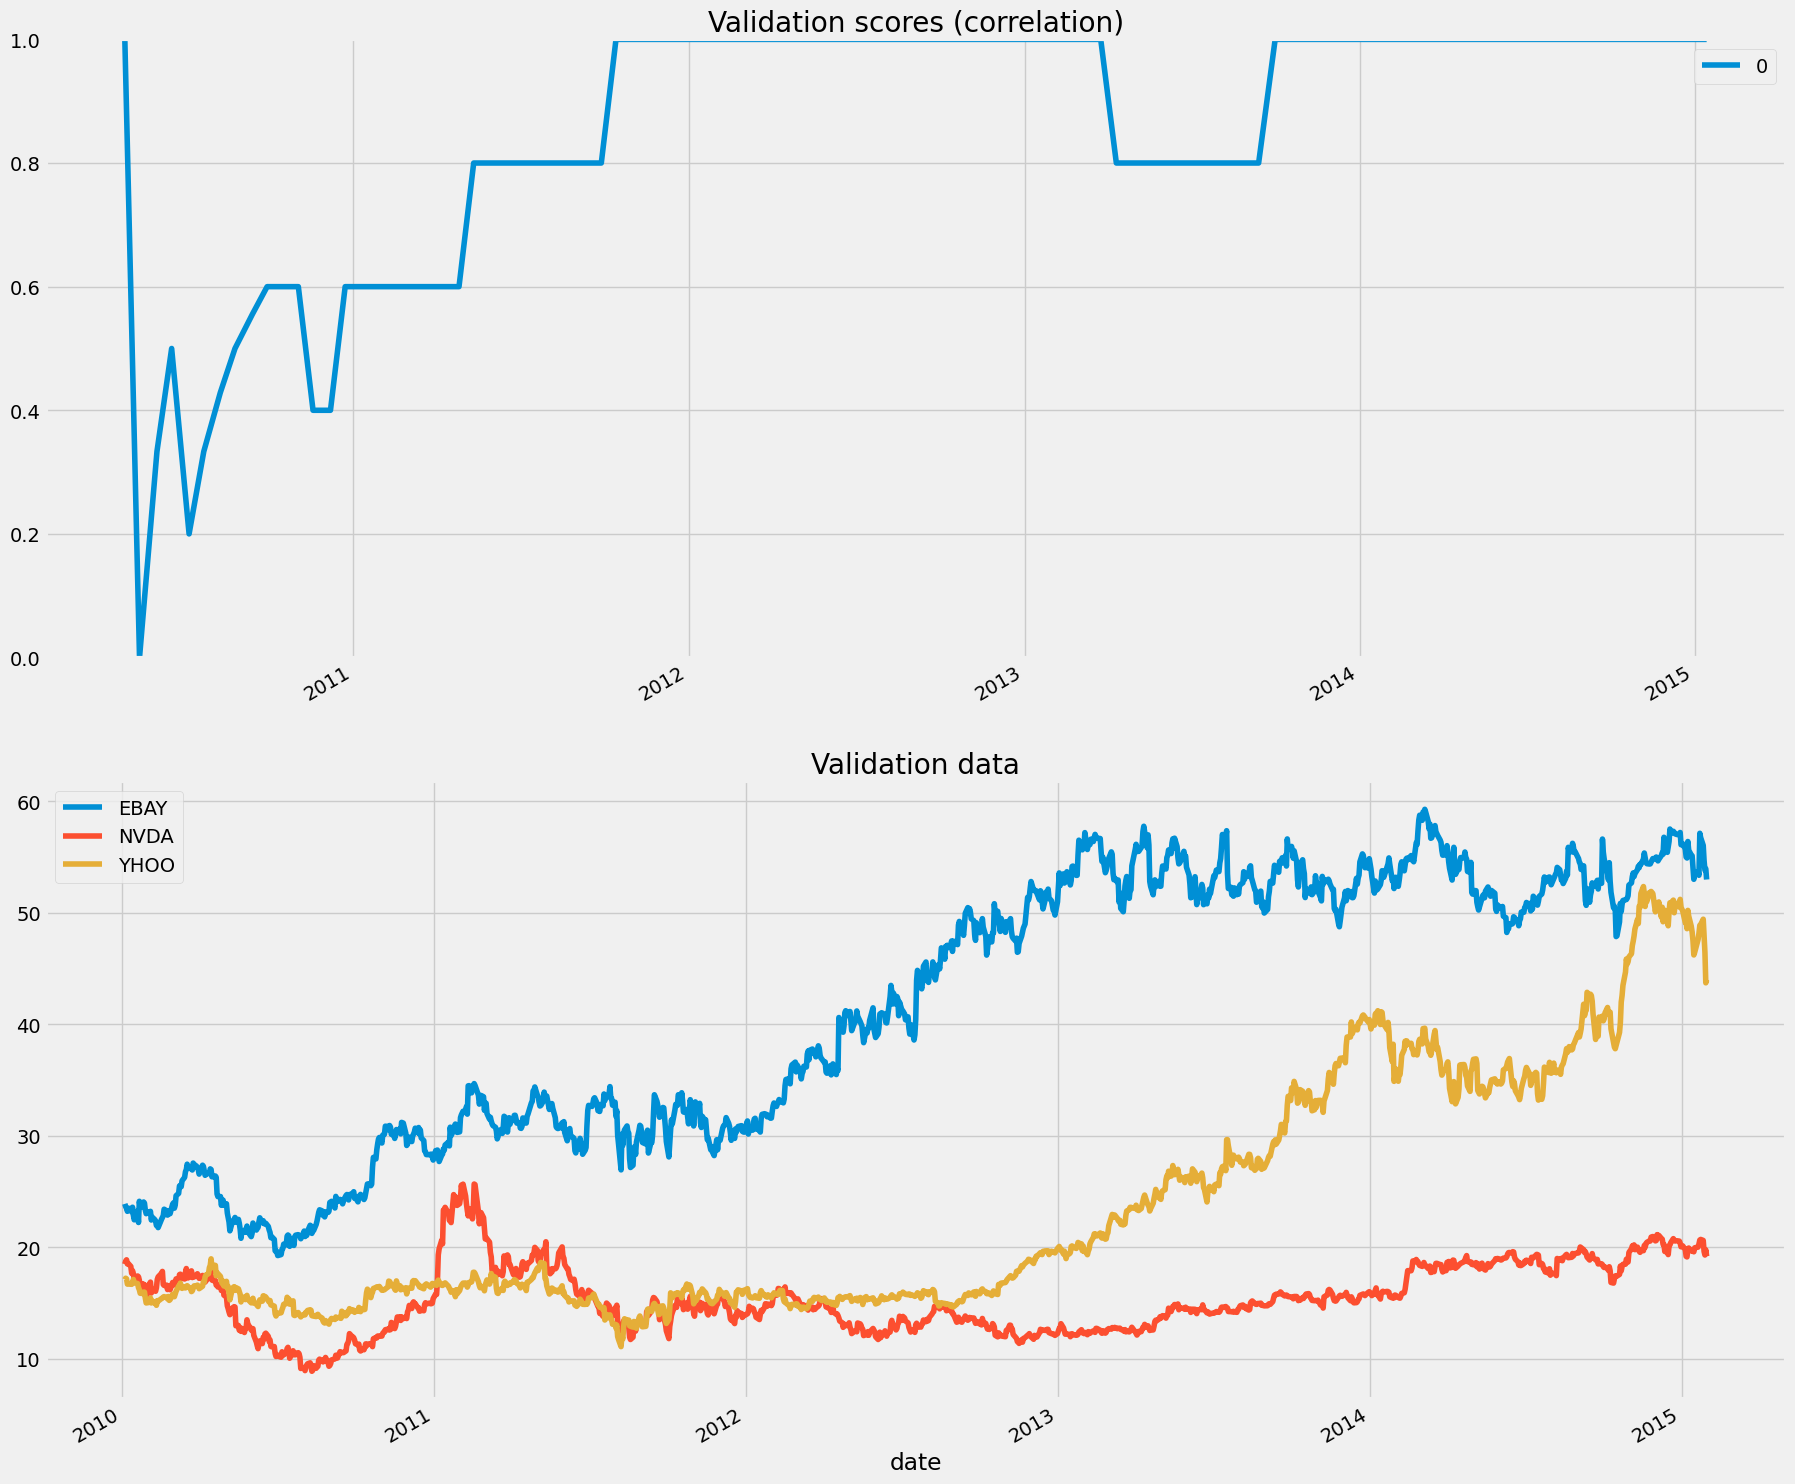

In [69]:
# Model performance over time

# score function will be the correlation between the predicted and the true values
def my_corrcoef(est, X, y):
    """Return the correlation coefficient
    between model predictions and a validation set."""
    score = np.corrcoef(np.hstack((y, est.predict(X))))[1, 0]
    return score

# define the cv split and the regression model 
cv = TimeSeriesSplit(n_splits=100)
model = Ridge()
first_indices = []

# Grab the date of the first index of each validation set
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    first_indices.append(X_df.index[tt[0]])
    
# Calculate the CV scores and convert to a Pandas Series
cv_scores = cross_val_score(model, X, y, cv=cv, scoring = my_corrcoef)
cv_scores = pd.DataFrame(cv_scores, index=first_indices)

# Visualizing model scores as a timeseries
fig, axs = plt.subplots(2, 1, figsize=(20, 20), sharex=False)

# Calculate a rolling mean of scores over time
cv_scores_mean = cv_scores.rolling(10, min_periods=1).mean()
cv_scores_mean.plot(ax=axs[0])
axs[0].set(title='Validation scores (correlation)', ylim=[0, 1])

# Plot the raw data
X_df.plot(ax=axs[1])
axs[1].set(title='Validation data')

[Text(0.5, 1.0, 'Validation data')]

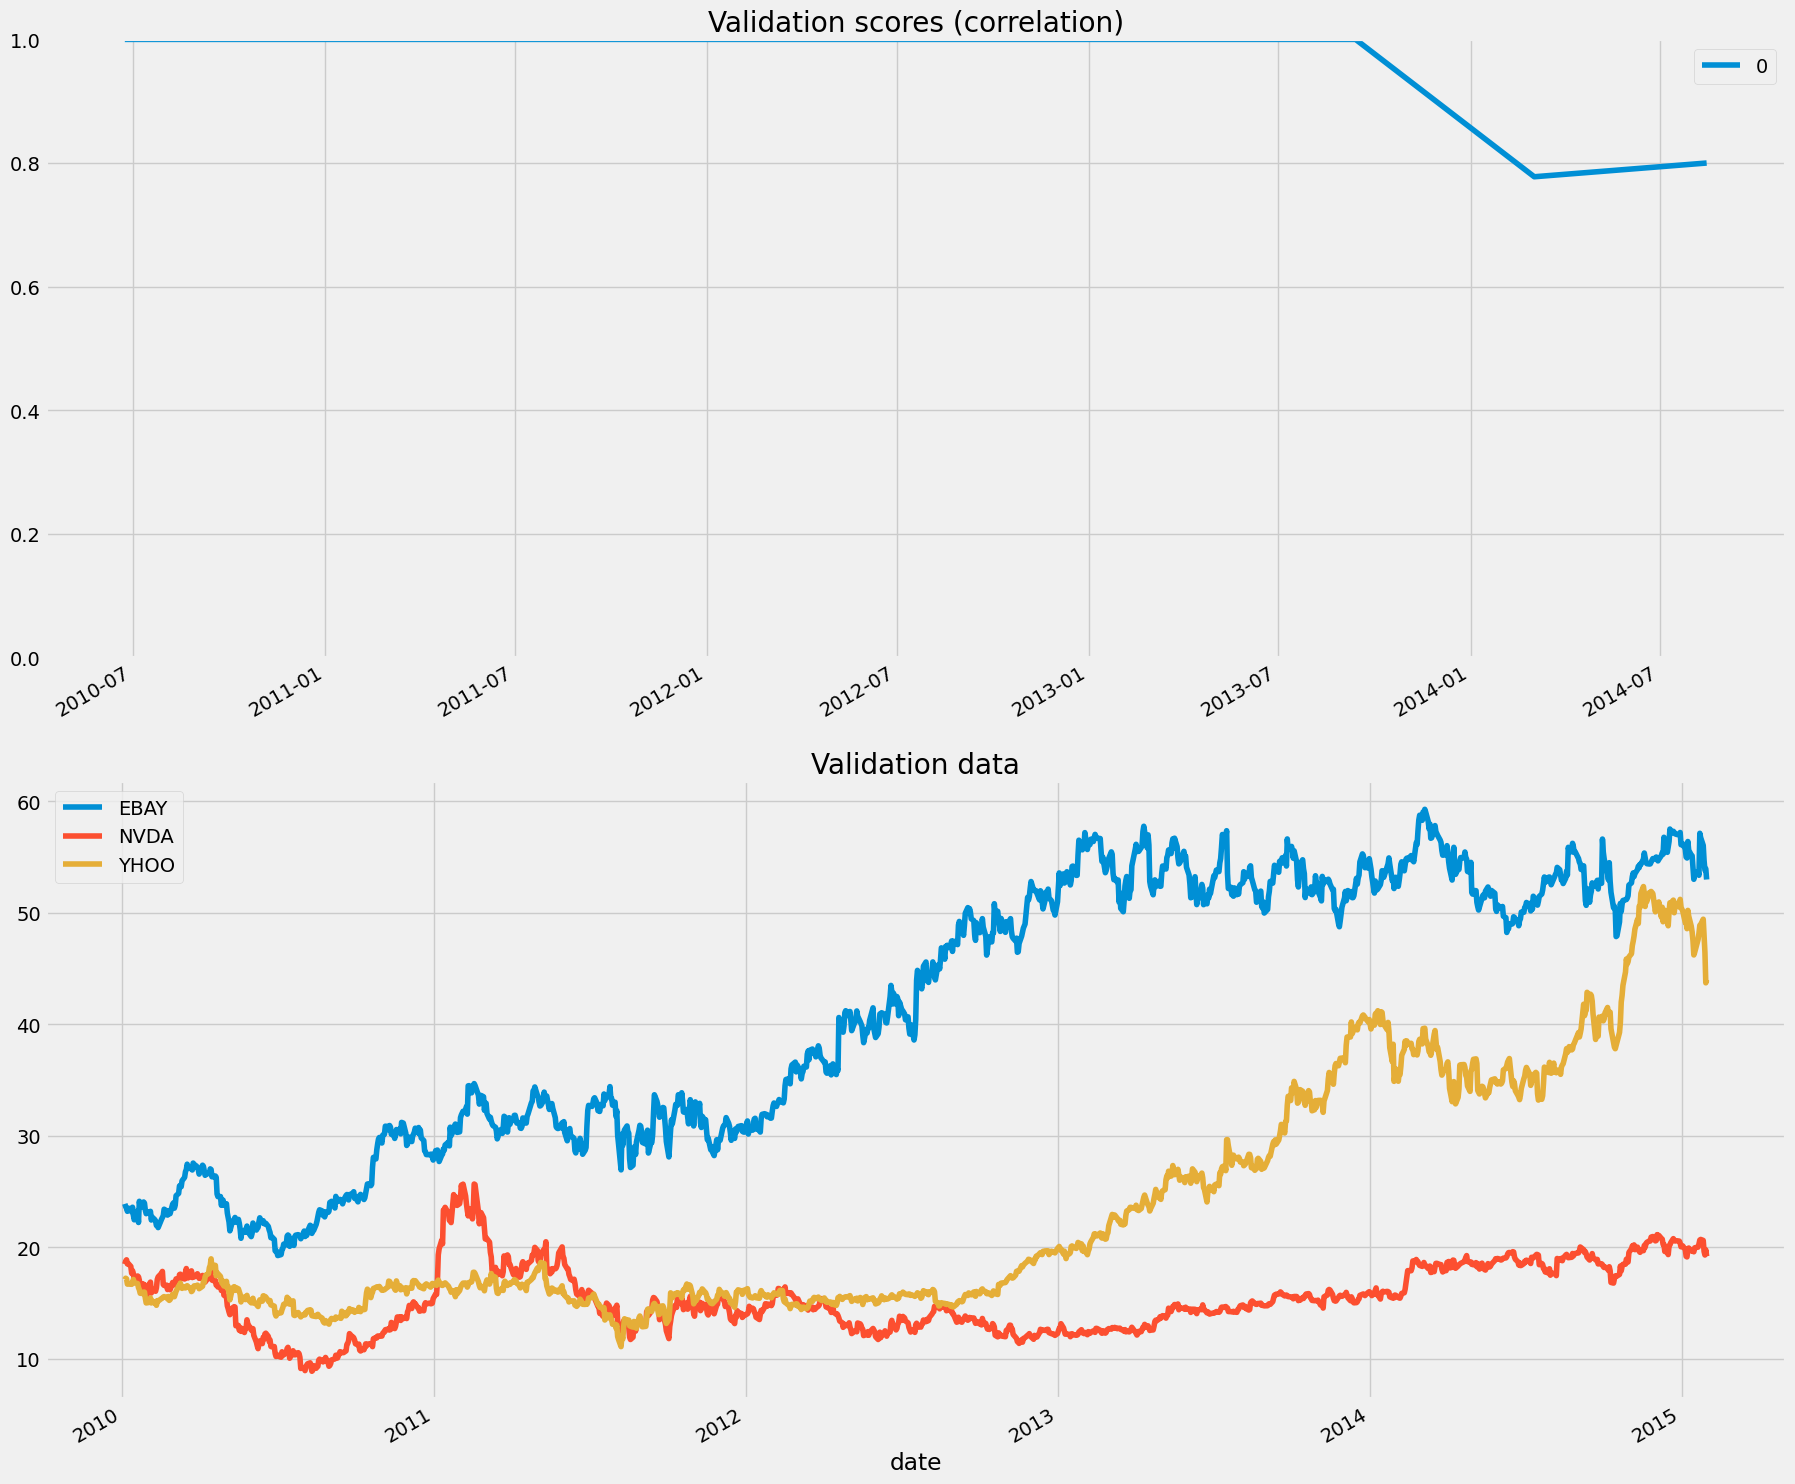

In [70]:
# Only keep the last 100 datapoints in the training data
window = 100

# Initialize the CV with this window size
cv = TimeSeriesSplit(n_splits=10, max_train_size=window)

model = Ridge()
first_indices = []

for tr, tt in cv.split(X, y):
    # Fit the model on training data
    first_indices.append(X_df.index[tt[0]])
    

model = Ridge()   
cv_scores = cross_val_score(model, X, y, cv=cv, scoring = my_corrcoef)

# Calculate the CV scores and convert to a Pandas Series
cv_scores = pd.DataFrame(cv_scores, index=first_indices)

#Visualizing model scores as a timeseries
fig, axs = plt.subplots(2, 1, figsize=(20, 20), sharex=False)

# Calculate a rolling mean of scores over time
cv_scores_mean = cv_scores.rolling(10, min_periods=1).mean()
cv_scores_mean.plot(ax=axs[0])
axs[0].set(title='Validation scores (correlation)', ylim=[0, 1])

# Plot the raw data
X_df.plot(ax=axs[1])
axs[1].set(title='Validation data')